<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<b>Юрий, привет!</b>

Меня зовут Владимир Бердников, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя — дай знать, и мы перейдем на "вы". Моя цель не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь улучшить навыки. 
    
Пожалуйста, не перемещай, не удаляй и не правь мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

При проверке работы я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария указан номер итерации проверки.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Комментарии такого цвета нужно исправить, иначе проект не будет принят. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Такой комментарий является рекомендацией или советом. 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Так выделены все остальные комментарии, включая позитивные моменты, пояснения и рассуждения.
</div>  
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте — пиши об этом в комментариях, например, с помощью такого кода в markdown ячейке:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ок.   

In [1]:
import os
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

In [2]:
# путь к БД на вашем компьютере (например, в той же папке, что и тетрадь)
path_to_db_local = 'telecomm_csi.db'
# путь к БД на платформе
path_to_db_platform = '/datasets/telecomm_csi.db'
# итоговый путь к БД
path_to_db = None

# если путь на вашем компьютере ведёт к БД, то он становится итоговым
if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
# иначе: если путь на платформе ведёт к БД, то он становится итоговым
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
# иначе выводится сообщение о том, что файл не найден
else:
    raise Exception('Файл с базой данных SQLite не найден!')

# если итоговый путь не пустой
if path_to_db:
    # то создаём подключение к базе
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)
    
    # пример запроса
    query = """
SELECT
    u.user_id,
    u.lt_day,
    CASE WHEN u.lt_day <= 365 THEN 'Yes' ELSE 'No' END AS is_new,
    u.age,
    CASE u.gender_segment WHEN 0 THEN 'Male' WHEN 1 THEN 'Female' ELSE 'Unknown' END AS gender_segment,
    u.os_name,
    u.cpe_type_name,
    l.country,
    l.city,
    a.title AS age_segment,
    t.title AS traffic_segment,
    lt.title AS lifetime_segment,
    u.nps_score,
    CASE
        WHEN u.nps_score BETWEEN 0 AND 6 THEN 'Critics'
        WHEN u.nps_score BETWEEN 7 AND 8 THEN 'Neutrals'
        WHEN u.nps_score BETWEEN 9 AND 10 THEN 'Promoters'
        ELSE 'Unknown'
    END AS nps_group
FROM user u
JOIN location l ON u.location_id = l.location_id
JOIN age_segment a ON u.age_gr_id = a.age_gr_id
JOIN traffic_segment t ON u.tr_gr_id = t.tr_gr_id
JOIN lifetime_segment lt ON u.lt_gr_id = lt.lt_gr_id;


    """
    
    # создаём датафрейм по данным запроса
    df = pd.read_sql(query, engine)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Таблицы соединены верно.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Рекомендую использовать метод `SUBSTR` или `SUBSTRING` в отношении параметров age_segment, traffic_segment, lifetime_segment. Он позволяет убрать лишние цифры. [Здесь](https://sql-academy.org/ru/handbook/SUBSTRING) краткая справка про функцию.

query = 
"""
SELECT
    u.user_id,
    u.lt_day,
    CASE WHEN u.lt_day < 30 THEN 'Yes' ELSE 'No' END AS is_new,
    u.age,
    CASE u.gender_segment WHEN 1 THEN 'Male' WHEN 2 THEN 'Female' ELSE 'Unknown' END AS gender_segment,
    u.os_name,
    u.cpe_type_name,
    l.country,
    l.city,
    a.title AS age_segment,
    t.title AS traffic_segment,
    lt.title AS lifetime_segment,
    u.nps_score,
    CASE
        WHEN u.nps_score BETWEEN 0 AND 6 THEN 'Critics'
        WHEN u.nps_score BETWEEN 7 AND 8 THEN 'Neutrals'
        WHEN u.nps_score BETWEEN 9 AND 10 THEN 'Promoters'
        ELSE 'Unknown'
    END AS nps_group
FROM user u
JOIN location l ON u.location_id = l.location_id
JOIN age_segment a ON u.age_gr_id = a.age_gr_id
JOIN traffic_segment t ON u.tr_gr_id = t.tr_gr_id
JOIN lifetime_segment lt ON u.lt_gr_id = lt.lt_gr_id;


"""

In [3]:
df = pd.read_sql(query, engine)
df.head(10)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,No,45.0,Female,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,04 1-5,08 36+,10,Promoters
1,A001WF,2344,No,53.0,Male,ANDROID,SMARTPHONE,Россия,Киров,05 45-54,04 1-5,08 36+,10,Promoters
2,A003Q7,467,No,57.0,Male,ANDROID,SMARTPHONE,Россия,Москва,06 55-64,08 20-25,06 13-24,10,Promoters
3,A004TB,4190,No,44.0,Female,IOS,SMARTPHONE,Россия,РостовнаДону,04 35-44,03 0.1-1,08 36+,10,Promoters
4,A004XT,1163,No,24.0,Male,ANDROID,SMARTPHONE,Россия,Рязань,02 16-24,05 5-10,08 36+,10,Promoters
5,A005O0,5501,No,42.0,Female,ANDROID,SMARTPHONE,Россия,Омск,04 35-44,05 5-10,08 36+,6,Critics
6,A0061R,1236,No,45.0,Male,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,06 10-15,08 36+,10,Promoters
7,A009KS,313,Yes,35.0,Male,ANDROID,SMARTPHONE,Россия,Москва,04 35-44,13 45-50,05 7-12,10,Promoters
8,A00AES,3238,No,36.0,Female,ANDROID,SMARTPHONE,Россия,СанктПетербург,04 35-44,04 1-5,08 36+,10,Promoters
9,A00F70,4479,No,54.0,Female,ANDROID,SMARTPHONE,Россия,Волгоград,05 45-54,07 15-20,08 36+,9,Promoters


In [4]:
csv_file_path = 'telecomm_csi_tableau.csv'
df.to_csv('telecomm_csi_tableau.csv', index=False)



In [5]:
try:
    from IPython.display import FileLink
    display(FileLink(csv_file_path))
    print(f'Ссылка на скачивание файла: {csv_file_path}')
except ImportError:
    print(f'Файл успешно сохранен: {csv_file_path}')

/home/jovyan/work/telecomm_csi_tableau.csv

Ссылка на скачивание файла: telecomm_csi_tableau.csv


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ К сожалению, нет ссылки на дашборд. Необходимо добавить сюда ссылку.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Не сохранилась тетрадка видимо, ссылка ниже   

Ссылка на презентацию tableu https://public.tableau.com/views/DAYuri_Vavilin-CourseVorkTelecomm/Story1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>  
    
✅ Сделано хорошо:
        
* нет проблем с открытием дашборда
    
* на вкладке расположено несколько графиков
    
* есть названия дашбордов и заголовки графиков
    
* представлены необходимые графики по распределению участников
    
* выбраны подходящие типы визуализаций; графики выглядят хорошо на дашборде, ничего не съезжает
    
* даны ответы на все вопросы по распределению
   

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Что обязательно нужно сделать:
    
* данные предоставлены по 502 493 чел., но на дашбордах их меньше; необходимо написать (например, в подзаголовке или рядом с ответами на вопросы), какие группы были удалены и почему (фильтровать их в работе необязательно, но в случае удаления данных нужно аргументировать) 
  
* переименовать названия фильтров на русский язык
  
* все фильтры должны применяться ко всем визуализациям; если фильтр задуман только для одной визуализации, его следует разместить рядом с ней, а не в общей группе фильтров    
   
* переименовать на русский язык подписи на оси Y всех визуализаций на всех дашбордах, чтобы графики было проще считывать пользователям
   
* из техзадания: "Перед компанией стоит задача определить текущий уровень потребительской лояльности, или NPS (от англ. Net Promoter Score), среди клиентов из России". NPS - это главное, что требуется рассчитать в задании. Подробнее об NPS есть в этой [статье](https://kontur.ru/compass/spravka-compass/22719-chto_takoe_nps_i_kak_rasschitat_indeks_loyalnosti_klientov?utm_referrer=https%3a%2f%2fwww.google.com%2f). Должны быть следующие графики (чтобы вычислить NPS, нужно вычесть процент критиков из процента сторонников):
    - NPS по полу
    - NPS по возрасту
    - NPS по lifetime и/или новым и старым клиентам
    (либо единую таблицу по трем категориям, с помощью highlight table; что позволит точнее определить портрет лояльного пользователя)
    - NPS по городу (построить можно с помощью, например, линейчатой (с горизонтальными столбиками) диаграммы, таблицы, географической карты)

* "Какие группы пользователей наиболее лояльны к сервису? Какие менее?" - подготовить ответ на основе анализа графиков по NPS. В частности, как меняется NPS в зависимости от возраста, есть ли какая-либо корреляция, чем старше возраст, тем ниже или выше NPS? В каком городе (или городах) NPS самый низкий и самый высокий (еще лучше написать, есть ли связь между количеством участников в городах и NPS)? Следует обратить внимание, что нужно отметить не только те группы, которые наиболее лояльны, но и те, которые менее лояльны к сервису. Ответы должны быть по всем визуализациям    
  

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Что можно лучше:
    
* отредактировать все подписи во всплывающих подсказках визуализаций на русский язык 
   
* убрать лишние легенды справа, вряд ли кто-то будет ими пользоваться, но они создают дополнительную когнитивную нагрузку
  
* добавить описание дашборда, чтобы помочь пользователям понять назначение и контекст данных, а также возможности дашборда 
    
* добавить общее количество участников (одно число на дашборде)
    
* добавить распределение участников опроса по (создав еще один дашборд): 
    * сторонникам, критикам и нейтралам
    * типу устройства
    * операционной системе
    * трафику
  
* добавить NPS по:
    * устройству
    * операционной системе
    * трафику  

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>


Новая ссылка https://public.tableau.com/shared/377XPCSTH?:display_count=n&:origin=viz_share_link

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"></h2>
    
❌ В целом, на дашборде с распределением участников почти всё доработано. Но сейчас в ответах на вопросы не хватает информации об участниках в разрезе по полу и возрасту. Также осталось подготовить визуализации по NPS и ответы к ним. Можно добавить кнопку для перехода на другой дашборд (через Navigation) или создать Story

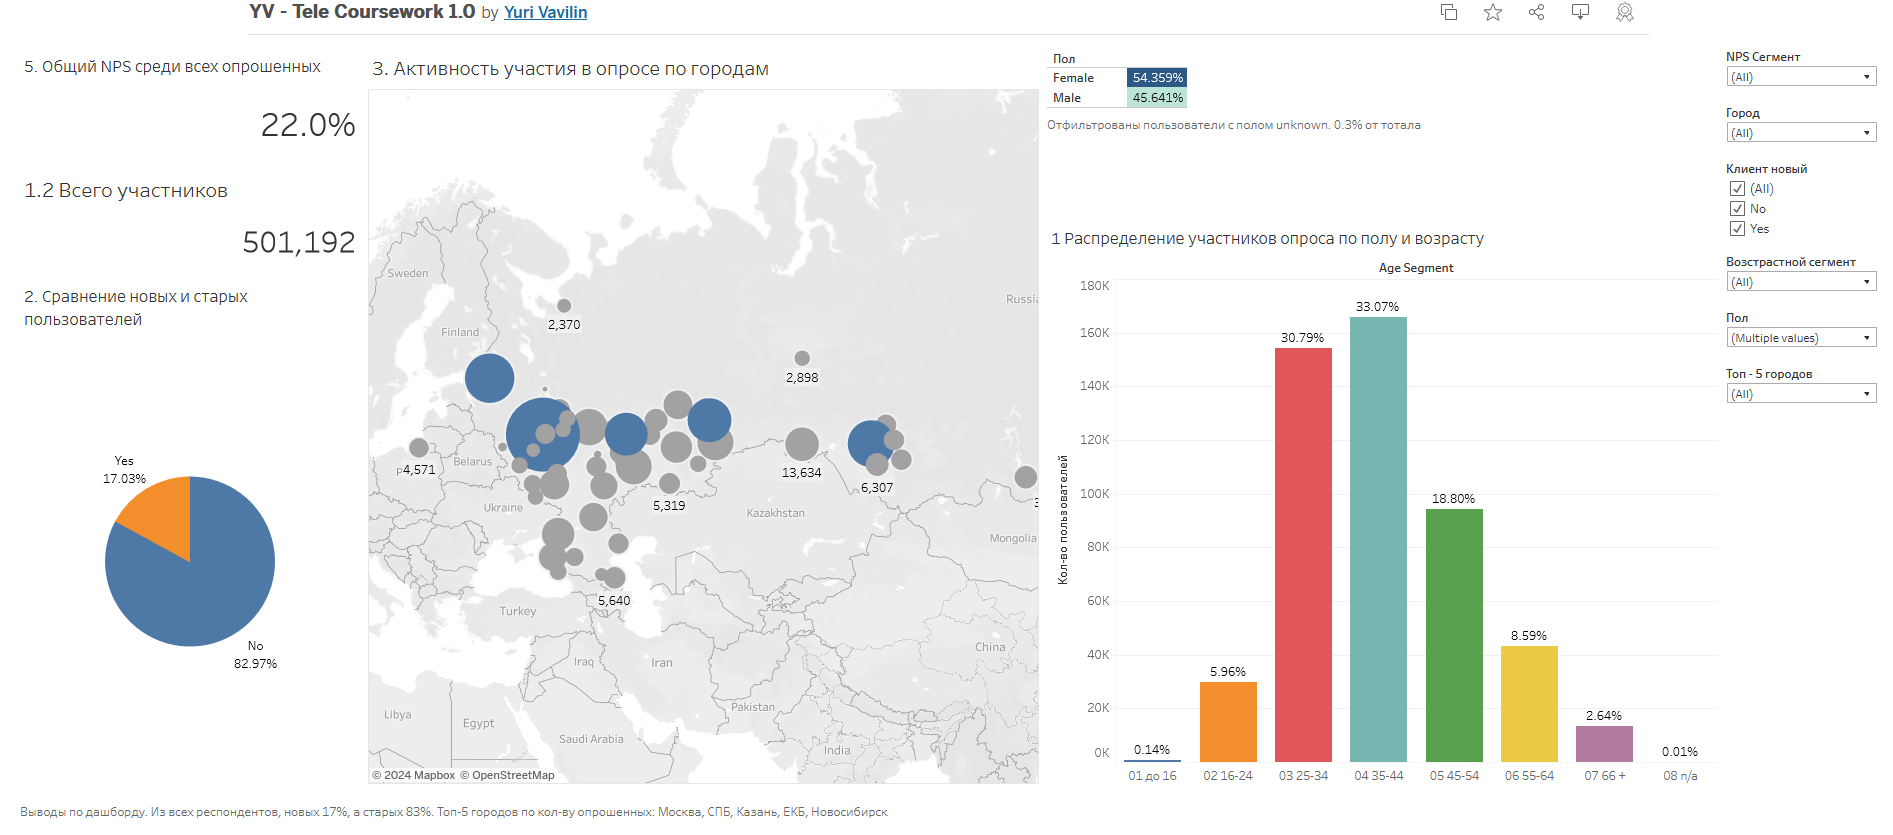

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_3: <a class="tocSkip"> </h2>


Прошу прощения, постоянная проблема с нормальным шерингом презентации. Доработанная версия → https://public.tableau.com/shared/29RQG2HFG?:display_count=n&:origin=viz_share_link

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_4: <a class="tocSkip"></h2>
    
❌ Визуализации по NPS приняты. Но нужно добавить ответ на вопрос: "Как распределены участники опроса по возрасту и полу?". Также не хватает комментария об NPS по полу.

Спасибо за комментарии. Ссылка на презентацию https://public.tableau.com/shared/FK8H2DPW7?:display_count=n&:origin=viz_share_link

1. Ответы на комментарий_4 пометил цветом в выводах.
2. Распределение участников по возрасту: общий даш, вывод справа. Лучше сделать полноэкранный режим, тогда не будет обрезаться
3. Дашборд NPS - ответ на вопрос доля NPS по полу.
4. Дашборд по участникам опроса. Добавил ответ на вопрос "как распределены участники опроса по возрасту и полу" чарт 6.4 и 6.5. + выводы 

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
 
<span style="color:darkblue">Комментарий ревьюера v_5:</span> 

Спасибо за доработанные замечания. Проект принят. 
    
Для углубления навыков работы с Tableau советую следующий бесплатный курс:

* [Дата йога. 8 ступеней](https://tableau.pro/8steps)

По [этой ссылке](https://public.tableau.com/app/discover/viz-of-the-day) можно посмотреть примеры дашбордов.
    
Также для всех желающих доступен курс ["Основы работы с DataLens"](https://practicum.yandex.ru/ycloud-datalens/) - это еще один инструмент, которые позволяет создавать графики и дашборды.
    
Много полезной информации про визуализации можно почерпнуть в telegram-каналах Ромы Бунина и Александра Богачева - [здесь](https://t.me/revealthedata) и [здесь](https://t.me/chartomojka)
    
Успехов в дальнейшем обучении!)